<a href="https://colab.research.google.com/github/jaewon-huh/DA_DS_dreamtree/blob/main/pandas_%EB%B3%B4%EC%B6%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 판다스 복습

In [ ]:
import numpy as np
import pandas as pd 

df1 = pd.DataFrame(np.arange(12).reshape(3,4), columns =list('abcd'))
df2 = pd.DataFrame(np.arange(20).reshape(4,5), columns =list('abcde'))

In [ ]:
df1

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [ ]:
df2

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [ ]:
# 겹치지 않는 부분 : nan
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,11.0,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 존재하지 않는 부분의 값은 0으로 지정 
df1.add(df2, fill_value= 0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


e열과 3행은 Nan 이 아닌 df2의 값으로 출력된다. 
(fill_value = 0 으로 df1의 존재하지 않는 값을 0으로 채움)

* DF와 Series의 연산 

In [ ]:
arr = np.arange(12).reshape((3,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
arr[0]

array([0, 1, 2, 3])

In [ ]:
# df - series 
arr- arr[0]
# 각 로우에 대해 실행 (브로드 캐스팅)

array([[0, 0, 0, 0],
       [4, 4, 4, 4],
       [8, 8, 8, 8]])

In [ ]:
frame = pd.DataFrame(np.arange(12).reshape((4,3)), 
                     columns = list('bde'),
                     index = ['A', 'B', 'C', 'D'])
series = frame.iloc[0]  # 0행

In [ ]:
frame

,b,d,e
A,0,1,2
B,3,4,5
C,6,7,8
D,9,10,11


In [ ]:
series

b    0
d    1
e    2
Name: A, dtype: int64

In [ ]:
# series의 인덱스를 df 칼럼에 맞추고 아래 로우로 전파 
frame - series

,b,d,e
A,0,0,0
B,3,3,3
C,6,6,6
D,9,9,9


In [ ]:
series2 = pd.Series(range(3), index = ['b', 'e','f'])
series2 

b    0
e    1
f    2
dtype: int64

In [ ]:
frame +series2
# 겹치는 열만 연산 

,b,d,e,f
A,0.0,NaN,3.0,NaN
B,3.0,NaN,6.0,NaN
C,6.0,NaN,9.0,NaN
D,9.0,NaN,12.0,NaN


In [ ]:
series3 = frame['d']
frame

,b,d,e
A,0,1,2
B,3,4,5
C,6,7,8
D,9,10,11


In [ ]:
series3

A     1
B     4
C     7
D    10
Name: d, dtype: int64

In [ ]:
# 산술 연산자 : 각 로우에 대해 연산 
frame.sub(series3 , axis ='index' ) 
# frame - series3  A행 - 1 , B행 -4 , C행 -7 

,b,d,e
A,-1,0,1
B,-1,0,1
C,-1,0,1
D,-1,0,1


* 함수 적용과 매핑 

In [ ]:
frame =pd.DataFrame(np.random.randn(4,3), 
                    columns = list('bde'),
                    index = ['A', 'B', 'C', 'D'])
frame

,b,d,e
A,-0.775526,-0.481349,-1.035386
B,-1.252228,-0.089307,0.120327
C,0.782473,0.586660,-0.659736
D,1.448221,1.595342,1.205117


In [ ]:
# 절대값
np.abs(frame) 

,b,d,e
A,0.775526,0.481349,1.035386
B,1.252228,0.089307,0.120327
C,0.782473,0.586660,0.659736
D,1.448221,1.595342,1.205117


In [ ]:
# 함수 적용 
frame.apply(lambda x : x +10)

,b,d,e
A,9.224474,9.518651,8.964614
B,8.747772,9.910693,10.120327
C,10.782473,10.586660,9.340264
D,11.448221,11.595342,11.205117


In [ ]:
f = lambda x : x.max() - x.min()
frame.apply(f)  # 각 칼럼에 대해 최대 -최소값 

b    2.700449
d    2.076691
e    2.240503
dtype: float64

In [ ]:
frame.apply(f, axis= 'columns') # 각 로우에 있어 

A    0.554037
B    1.372555
C    1.442209
D    0.390225
dtype: float64

In [ ]:
# 각 원소에 적용되는 함수 : 매핑 applymap
format = lambda x : '%.2f' % x 
frame.applymap(format)

,b,d,e
A,-0.78,-0.48,-1.04
B,-1.25,-0.09,0.12
C,0.78,0.59,-0.66
D,1.45,1.60,1.21


인덱스 정렬 : sort_index(axis = 0 (디폴트) / 1(열))  
값에 따라 정렬 : sort_values( , by = 'columns' (기준열) )



순위 : rank()

In [ ]:
# 동점인 경우 평균 순위 
obj = pd.Series([7, -5, 7,4, 2, 0, 4])
obj

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64

In [ ]:
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [ ]:
# 동점인 경우 먼저 등장한 순서에 따라 순위 
obj.rank(method = 'first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [ ]:
# 4 값 : 공동 4등 
obj.rank(method ='min')


0    6.0
1    1.0
2    6.0
3    4.0
4    3.0
5    2.0
6    4.0
dtype: float64

순위의 동률 처리 메서드 : average (평균값) , min(낮은 순위로) , max(높은 순위로) ,  
first(데이터 위치에 따라) , dense( min 적용, 1씩 증가시킴)

* 기술 통계 계산 및  요약

In [ ]:
df= pd.DataFrame(np.arange(8).reshape(4,2))
df

,0,1
0,0,1
1,2,3
2,4,5
3,6,7


In [ ]:
df.sum()

0    12
1    16
dtype: int64

In [ ]:
df.sum(axis =1)

0     1
1     5
2     9
3    13
dtype: int64

In [ ]:
df.cumsum() # 누적 합

,0,1
0,0,1
1,2,4
2,6,9
3,12,16


* 상관관계와 공분산  
df[ 칼럼리스트 ].corr() : 상관관계   
corrwith() : 다른 series나 df와의 상관관계 

### 7. 데이터 정제 및 준비 

* 값 치환하기 df.replace()

In [ ]:
data = pd.Series([1, -999, 2, -999, - 1000 , 3])
data

0       1
1    -999
2       2
3    -999
4   -1000
5       3
dtype: int64

In [ ]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [ ]:
data.replace([-999, -1000], [999, 1000])

0       1
1     999
2       2
3     999
4    1000
5       3
dtype: int64

In [ ]:
data.replace({-999 : 9 , -1000 : 10})

0     1
1     9
2     2
3     9
4    10
5     3
dtype: int64

DF 생성 = pd.Dataframe( {키1 : [값], 키2  : [값 ] }, index = [ , ,  ], columns =  [ , , ])

In [ ]:
data = np.arange(12).reshape(4,3)
df = pd.DataFrame(data , index = list('abcd'), columns = ['c1', 'c2', 'c3'])
df

,c1,c2,c3
a,0,1,2
b,3,4,5
c,6,7,8
d,9,10,11


행과 열 이름 바꾸기이

In [ ]:
df.index = df.index.map(lambda x : x.upper())
df

,c1,c2,c3
A,0,1,2
B,3,4,5
C,6,7,8
D,9,10,11


In [ ]:
# 리스트로 바꾸기 
df.columns = ['col1', 'col2', 'col3']
df.index = ['j', 'k', 'l', 'm']
df

,col1,col2,col3
j,0,1,2
k,3,4,5
l,6,7,8
m,9,10,11


In [ ]:
# rename() + 딕셔너리로 바꾸기 
df.rename(columns = {'col1' : 'c1'}, inplace = True)
df

,c1,col2,col3
j,0,1,2
k,3,4,5
l,6,7,8
m,9,10,11


* 개별화와 양자화  
구간분할(그룹) : pd.cut(x , bins = , labels , include_lowest = T /F)

In [ ]:
ages = list(np.random.randint(10 , 40 , size =10))
ages

[39, 18, 29, 20, 32, 30, 13, 12, 23, 29]

In [ ]:
# pandas.cut()
bins = [10 , 20 , 30 , 40]  # 10~ 20 / 20~30 / 30~ 40 3그룹 
cats = pd.cut(ages, bins , include_lowest= True) 

In [ ]:
cats # 카테고리를 반환함

[(30.0, 40.0], (9.999, 20.0], (20.0, 30.0], (9.999, 20.0], (30.0, 40.0], (20.0, 30.0], (9.999, 20.0], (9.999, 20.0], (20.0, 30.0], (20.0, 30.0]]
Categories (3, interval[float64, right]): [(9.999, 20.0] < (20.0, 30.0] < (30.0, 40.0]]

In [ ]:
cats.codes  # 각 데이터들이 어디에 속하는가

array([2, 0, 1, 0, 2, 1, 0, 0, 1, 1], dtype=int8)

In [ ]:
cats.categories

IntervalIndex([(9.999, 20.0], (20.0, 30.0], (30.0, 40.0]], dtype='interval[float64, right]')

In [ ]:
pd.value_counts(cats) # 구간당 데이터 수 

(9.999, 20.0]    4
(20.0, 30.0]     4
(30.0, 40.0]     2
dtype: int64

 cut 함수에 경계값 bins 를 넘기지 않고 그룹의 개수를 넘기면 자동으로 균등한 길이의 그룹 분할 

In [ ]:
data = np.random.rand(20)
print(data , '\n')
pd.cut(data ,4 , precision =2 ) # precision : 소수점 2자리 제한 

[0.54423601 0.47207231 0.8832982  0.77588848 0.37637305 0.28835747
 0.86388467 0.78999783 0.7607567  0.95111231 0.69476583 0.43604579
 0.80597767 0.08705629 0.95191114 0.68907262 0.9252423  0.47135936
 0.44614638 0.30308951] 



[(0.52, 0.74], (0.3, 0.52], (0.74, 0.95], (0.74, 0.95], (0.3, 0.52], ..., (0.52, 0.74], (0.74, 0.95], (0.3, 0.52], (0.3, 0.52], (0.086, 0.3]]
Length: 20
Categories (4, interval[float64, right]): [(0.086, 0.3] < (0.3, 0.52] < (0.52, 0.74] < (0.74, 0.95]]

qcut() : 변위수 기준으로 데이터를 자동으로 나눔 

In [ ]:
data = np.random.randn(1000)  # 정규분포 따르는 배열 
cats = pd.qcut(data, 4) # 4분위 수로 나눔
cats

[(-3.0189999999999997, -0.672], (-0.672, -0.00371], (0.665, 3.089], (-0.00371, 0.665], (-0.672, -0.00371], ..., (-3.0189999999999997, -0.672], (0.665, 3.089], (0.665, 3.089], (0.665, 3.089], (0.665, 3.089]]
Length: 1000
Categories (4, interval[float64, right]): [(-3.0189999999999997, -0.672] < (-0.672, -0.00371] < (-0.00371, 0.665] <
                                           (0.665, 3.089]]

In [ ]:
pd.value_counts(cats)

(-3.0189999999999997, -0.672]    250
(-0.672, -0.00371]               250
(-0.00371, 0.665]                250
(0.665, 3.089]                   250
dtype: int64

In [ ]:
cats2 = pd.qcut(data, [0 , 0.1 , 0.5, 0.9 , 1]) # 직접 변위치를 지정 

In [ ]:
cats2

[(-3.0189999999999997, -1.266], (-1.266, -0.00371], (1.266, 3.089], (-0.00371, 1.266], (-1.266, -0.00371], ..., (-1.266, -0.00371], (-0.00371, 1.266], (-0.00371, 1.266], (-0.00371, 1.266], (1.266, 3.089]]
Length: 1000
Categories (4, interval[float64, right]): [(-3.0189999999999997, -1.266] < (-1.266, -0.00371] < (-0.00371, 1.266] <
                                           (1.266, 3.089]]

In [ ]:
cats2.categories

IntervalIndex([(-3.0189999999999997, -1.266], (-1.266, -0.00371], (-0.00371, 1.266], (1.266, 3.089]], dtype='interval[float64, right]')

* 특이값을 찾고 제외하기

In [ ]:
data = pd.DataFrame(np.random.randn(1000,4))  # 1000행 4열 ?
data.shape

(1000, 4)

In [ ]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.014686,-0.009660,0.084719,0.039978
std,0.996133,0.993161,1.030489,1.049844
min,-2.745670,-3.249862,-3.441238,-3.233583
25%,-0.714549,-0.694015,-0.608260,-0.654670
50%,-0.039146,-0.016120,0.097252,0.005211
75%,0.662062,0.677649,0.815826,0.753488
max,2.889950,3.240208,2.966662,3.728450


In [ ]:
# 컬럼 2에서 절대값이 3 넘어가는 값 
col= data[2]
col[np.abs(col) > 3] # 3개 행 

74    -3.140792
340   -3.006277
434   -3.441238
457   -3.027951
711   -3.156775
Name: 2, dtype: float64

In [ ]:
# 모든데이터 (불린 인덱싱)
data[(np.abs(data) > 3).any(1)] # 하나라도 절대값이 3이 넘어가는 행을 반환 

,0,1,2,3
74,-1.296785,-1.560177,-3.140792,-0.941344
82,-0.392753,-3.223192,-0.066899,0.307100
137,0.256925,-3.048836,2.966662,2.327785
172,0.401368,-3.249862,-1.605622,0.956419
340,-0.378793,-0.453635,-3.006277,0.431580
413,-1.130344,-1.955881,1.202854,3.293496
428,1.209671,-1.134183,1.546466,3.728450
434,-0.382518,-0.249469,-3.441238,1.234890
457,-0.263261,0.108553,-3.027951,0.210562
571,-1.286014,-0.104538,0.742455,-3.233583


In [ ]:
# 모든데이터 (불린 인덱싱)
# 데이터의 값이 3이 넘어가는 모든 행
data.loc[ abs(data.values) > 3, : ]

,0,1,2,3
74,-1.296785,-1.560177,-3.140792,-0.941344
82,-0.392753,-3.223192,-0.066899,0.307100
137,0.256925,-3.048836,2.966662,2.327785
172,0.401368,-3.249862,-1.605622,0.956419
340,-0.378793,-0.453635,-3.006277,0.431580
413,-1.130344,-1.955881,1.202854,3.293496
428,1.209671,-1.134183,1.546466,3.728450
434,-0.382518,-0.249469,-3.441238,1.234890
457,-0.263261,0.108553,-3.027951,0.210562
571,-1.286014,-0.104538,0.742455,-3.233583


In [ ]:
# -3이나 3을 초과하는 값을 -3이나 3으로 지정함. 
data[np.abs(data) >3] = np.sign(data) *3
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.014686,-0.009295,0.085492,0.037817
std,0.996133,0.990513,1.028053,1.041671
min,-2.745670,-3.000000,-3.000000,-3.000000
25%,-0.714549,-0.694015,-0.608260,-0.654670
50%,-0.039146,-0.016120,0.097252,0.005211
75%,0.662062,0.677649,0.815826,0.753488
max,2.889950,3.000000,2.966662,3.000000


In [ ]:
# np.sign(data) : data 값이 양수인지 음수인지에 따라 1 or -1이 담긴 배열 반환
np.sign(data).head()


,0,1,2,3
0,1.0,1.0,1.0,-1.0
1,1.0,1.0,1.0,-1.0
2,1.0,-1.0,-1.0,1.0
3,-1.0,-1.0,1.0,1.0
4,-1.0,-1.0,1.0,1.0


* Df, series의 인덱스 순서 재배치(이름바꾸는거 x)

In [ ]:
df.sort_index(ascending = False) # 정렬 

,c1,col2,col3
m,9,10,11
l,6,7,8
k,3,4,5
j,0,1,2


In [ ]:
# take 함수 
df = pd.DataFrame(np.arange(5*4).reshape((5,4)))
# permutatuon : 순서 섞기 
sampler = np.random.permutation(5)  
sampler

array([4, 0, 1, 2, 3])

In [ ]:
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [ ]:
df.take(sampler)

,0,1,2,3
4,16,17,18,19
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


* 더미 변수 생성 : pd.get_dummies()

In [ ]:
df= pd.DataFrame({'key' : ['b','b', 'a', 'c', 'a', 'b'],
                  'data1' : range(6)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [ ]:
# key열 범주형 데이터를 더미변수로 변환함 
# a / b /c 
pd.get_dummies(df['key'])
# bbacab

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [ ]:
# 칼럼에 접두어 추가한후 df 병합 : get_dummies( , prefix = '칼럼')
dummies = pd.get_dummies(df['key'], prefix ='key')
dummies

,key_a,key_b,key_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [ ]:
# df의 data1 열과 더미df 결합 
df_with_dummy = df[['data1']].join(dummies) 
# join함수는 두 df의 행인덱스 기준 결합
df_with_dummy


,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


ex) 영화 평점 데이터 : 한 레코드가 여러 카테고리에 속할경우 (액션/코미디/로맨스)

* 코랩에서 깃허브 파일 다운로드 

In [ ]:
# 내 드라이브와 연동
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! las

'주택가격 데이터셋 '		       numpy.ipynb
 Chap01.ipynb			      'pandas 개념.ipynb'
'Colab Notebooks'		       Pokemon_EDA.ipynb
'통계 설문지.docx'		       puffinbrowser
'고객 구매 데이터 전처리 연습.ipynb'   rexpert30viewer-1.exe
'Numpy 기초 연습 '		       SanFranciscoCrime_classification_EDA


In [ ]:
cd "/content/drive/My Drive/"

/content/drive/My Drive


In [ ]:
!git clone https://github.com/wesm/pydata-book.git

Cloning into 'movies.dat'...
fatal: repository 'https://github.com/wesm/pydata-book/blob/2nd-edition/datasets/movielens/movies.dat/' not found


In [ ]:
path = "pydata-book/datasets/movielens/movies.dat"
movies = pd.read_table( path ,sep = '::', header = None, names = mnames)
movies[:10]

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


: 영화마다 장르가 여러개 있는 것도 있다.

In [ ]:
# 유일한 장르 목록 추출 
all_genres = []
for x in movies.genres :
  all_genres.extend(x.split('|'))   # |구분자로 나누어 all genres 안에 추가 
genres = pd.unique(all_genres)

In [ ]:
genres # 장르 목록

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

In [ ]:
# 더미 df 로 생성 
# 행 개수 영화수 / 열 개수 장르수 행렬 생성, 값 0 
zero_matrix = np.zeros((len(movies), len(genres))) 
# df 화
dummies = pd.DataFrame(zero_matrix , columns = genres )

In [ ]:
# 각 영화 데이터를 순회하며 dummies의 각 로우 항목을 1로 설정 . 
gen = movies.genres[0] # 첫번째 데이터 장르 
gen.split('|')

['Animation', "Children's", 'Comedy']

dummies의 칼럼은 영화 장르들 / get_indexer(['애니, 아동 , 코미디'] ) : columns에 있는 위치의 배열 반환 

In [ ]:
dummies.columns.get_indexer(gen.split('|'))


array([0, 1, 2])

첫번째 영화의 장르들은 각각 칼럼 처음 0 1 2 에 위치함 -> 이 값을 1로 채우면 더미변수가 됨. 

In [ ]:
for i, gen  in enumerate(movies.genres) : # 인덱스와 값 
    indices = dummies.columns.get_indexer(gen.split('|')) # 칼럼들 내에서 위치 
    dummies.iloc[i, indices] = 1    # 1로 채움
dummies.head()

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# movies와 조합 영화 이름 & 장르 더미 
movies_windic = movies.join(dummies.add_prefix('Genres')) # 더미 df 칼럼에 접두어 Genres를 붙여 결합 
movies_windic.iloc[0] # 첫행 

movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
GenresAnimation                              1.0
GenresChildren's                             1.0
GenresComedy                                 1.0
GenresAdventure                              0.0
GenresFantasy                                0.0
GenresRomance                                0.0
GenresDrama                                  0.0
GenresAction                                 0.0
GenresCrime                                  0.0
GenresThriller                               0.0
GenresHorror                                 0.0
GenresSci-Fi                                 0.0
GenresDocumentary                            0.0
GenresWar                                    0.0
GenresMusical                                0.0
GenresMystery                                0.0
GenresFilm-Noir                              0.0
GenresWestern       

In [ ]:
# get_dummies 와 cut 조합 
np.random.seed(1234)
values = np.random.rand(10) # rand : 0 ~ 1
values

array([0.19151945, 0.62210877, 0.43772774, 0.78535858, 0.77997581,
       0.27259261, 0.27646426, 0.80187218, 0.95813935, 0.87593263])

In [ ]:
bins = [0 , 0.2 , 0.4 , 0.6 ,0.8 , 1 ] # 5구간 
pd.cut(values, bins)

[(0.0, 0.2], (0.6, 0.8], (0.4, 0.6], (0.6, 0.8], (0.6, 0.8], (0.2, 0.4], (0.2, 0.4], (0.8, 1.0], (0.8, 1.0], (0.8, 1.0]]
Categories (5, interval[float64, right]): [(0.0, 0.2] < (0.2, 0.4] < (0.4, 0.6] < (0.6, 0.8] <
                                           (0.8, 1.0]]

In [ ]:
pd.get_dummies(pd.cut(values, bins))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,1,0,0,0
6,0,1,0,0,0
7,0,0,0,0,1
8,0,0,0,0,1
9,0,0,0,0,1


* 문자열 다루기 

In [ ]:
# 문자열 split 
val = 'a,b,   git'
val.split(',')

['a', 'b', '   git']

In [ ]:
# strip 메서드와 조합 : 공백 제거 
pieces = [x.strip () for x in val.split(',')]
pieces

['a', 'b', 'git']

In [ ]:
# 문자열 더하기 연산 join
'::'.join(pieces)

'a::b::git'

In [ ]:
# x in str - T/ F  , str.index('x')
'a' in val , val.index('a')

(True, 0)

In [ ]:
#str.find('x')  : T = index / F =  -1
val.find('c')


-1

In [ ]:
# count() 특정 문자열이 몇번 등장 
val.count(',')

2

In [ ]:
# 특정 값 치환 
val.replace(',' , ' :')


'a :b :   git'

파이썬 내장 문자열 함수 : 
startswith , endswith - 접두사 접미사 T/F ,  
join : 이어 붙이기   
split :  구분자로 분리   
find, rfind : 찾는 문자의 인덱스 위치 반환 . 없으면 -1   
lower,upper : 대소문자 변환 
 

* 정규표현식 !! : 특정한 문자열(패턴)을 찾아낼때 사용하는 표현식   
\s+ : 하나 이상의 공백문자를 의미 

In [ ]:
import re  # re모듈 : 패턴 매칭 ,치환 , 분리 
text = 'foo bar\t baz\t qux'    # \t : 문자열 사이 탭간격
# split으로 분리
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

In [ ]:
# complie로 정규 표현식 컴파일 
regex =re.compile('\s+')
regex

re.compile(r'\s+', re.UNICODE)

In [ ]:
print(regex.split(text))
print('\n')
print(regex.findall(text))

['foo', 'bar', 'baz', 'qux']


[' ', '\t ', '\t ']


* 이메일 주소를 검사하는 정규표현식  
wodnjs8201@naver.com =   
[0-9a-zA-Z]([-_\.]?[0-9a-zA-Z]) *@ [0-9a-zA-Z]([-_\.]?[0-9a-zA-Z]) * \. [a-zA-Z]{2,3}  
앞 아이디 :[a-z 대소문자,0-9](중간에 -_\.같은 문자 있을수도) /    
골뱅이 @ /  
사이트 : [a-z, 0-9]/  
.(dot) /  
com,kr : [a-z]{2,3} 2에서 3자리 문자열 


In [ ]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

In [ ]:
regex =re.compile(pattern , flags = re.IGNORECASE)  # 컴파일 (flags : 대소문자 무시 )


In [ ]:
# 정규식과 매치되는 몯든 문자열을 리스트로 반환 
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [ ]:
# search : 문자열 전체를 검색해 정규식과 매치되는지 
m = regex.search(text)
m # 첫번째 이메일 주소와 정규표현 패틴의 문자열 내 위치 
text[m.start():m.end()]

'dave@google.com'

In [ ]:
# match : 문자열의 시작점부터 정규식과 매치되는지 
print(regex.match(text))

None


In [ ]:
# sub : 찾은 패턴을 주어진 문자열로 치환 
print(regex.sub('REDACTED', text))  # 이메일 패턴 문자열을 'REDACTED'로 치환 

Dave REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED



In [ ]:
# 이메일 주소를 찾아 구성별로 구분 (사용자 이름 / 도메인이름 / 도메인접미사)
# 각 패턴을 괄호로 묶어줌
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
regex = re.compile(pattern , flags =re.IGNORECASE)

In [ ]:
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

In [ ]:
m = regex.match('gjwos1231@naver.com')
m.groups() 
# 그룹 메서드로 각 패턴 컴포넌트의 튜플 

('gjwos1231', 'naver', 'com')

정규 표현식 메서드   
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'  
regex = re.compile(pattern)  
regex.findall() : 정규식과 매치되는 모든 문자열을 리스트로 반환   
finditer() : iter 객체로 반환  
match() : 문자열의 시작점부터 정규식(패턴)과 매치되는지 조사   
search() : 문자열에서 패턴과 일치하는 내용을 찾고 match 객체 반환  
match 객체 -> group() , start() , end(), span()

*벡터화된 문자열 메서드   
cat: 구분자와 함께 요소별로 문자열 이어 붙이기   
contains : 포함 ? , get() : i번째 요소 반환 
count : 일치하는 패턴수 반환 등등

### 8. 데이터 준비 : 조인 , 병합 , 변형 

In [ ]:
# 멀티인덱스 
data = pd.Series(np.random.randn(9), 
                 index = [ ['a','a','a','b','b','c','c','d','d'],
                          [1,2,3,1,3,1,2,2,3]])
data

a  1   -0.494415
   2    0.220973
   3   -1.785051
b  1   -0.386054
   3   -1.259323
c  1   -0.032322
   2   -0.839133
d  2   -1.501241
   3    0.543627
dtype: float64

In [ ]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [ ]:
data.loc[['b','c']]

b  1   -0.386054
   3   -1.259323
c  1   -0.032322
   2   -0.839133
dtype: float64

In [ ]:
data.loc[:, 2] # 하위 계층의 객체 선택 2

a    0.220973
c   -0.839133
d   -1.501241
dtype: float64

In [ ]:
data.loc['a', 2]

0.2209725916050341

In [ ]:
# unstack() 
data.unstack()

,1,2,3
a,-0.494415,0.220973,-1.785051
b,-0.386054,NaN,-1.259323
c,-0.032322,-0.839133,NaN
d,NaN,-1.501241,0.543627


In [ ]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'],
                              ['Green', 'Red', 'Green']])
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame


state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [ ]:
# 계층 순서 변경 swaplevel 
frame.swaplevel('key1', 'key2')  # 원본은 변경 x 

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [ ]:
# 인덱스 정렬
frame.sort_index(level= 1)  # level1 :  key2, ascending

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

* 계층별 요약 통계 

In [ ]:
# key2 : 1 , 2 별 로우 합 
frame.sum(level = 'key2')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  


state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [ ]:
frame.sum(level = 'color', axis =1 ) # 기준 color 합 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  """Entry point for launching an IPython kernel.


color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

set_index() :  칼럼을 인덱스로 설정   
reindex(새인덱스 배열) : 인덱스 지정   
reset_index() : 인덱스 원상태 (기존인덱스는 열로)

* 데이터 합치기 : merge , join , concat()

In [ ]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})
df1


,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [ ]:

df2

,key,data2
0,a,0
1,b,1
2,d,2


In [ ]:
# 기준열 key : 
pd.merge(df1,df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [ ]:
# 두 df에 중복된 컬럼 x 
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
                    'data2': range(3)})
pd.merge(df3, df4, left_on='lkey', right_on='rkey')
# c,d (X) : merge - 교집합 how = 'inner 

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [ ]:
# concat() 
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])

pd.concat([s1, s2, s3]) # axis =0 

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [ ]:
pd.concat([s1,s2,s3] , axis =1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [ ]:
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'])


,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [ ]:
s4 = pd.concat([s1,s3])
s4

a    0
b    1
f    5
g    6
dtype: int64

In [ ]:
# 계층적 색인 keys 인자로 개별 Series 구분 
# s1 : one / s1 = two /  s3  : three 
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [ ]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                   columns=['one', 'two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
                   columns=['three', 'four'])
df1

,one,two
a,0,1
b,2,3
c,4,5


In [ ]:
df2

,three,four
a,5,6
c,7,8


In [ ]:
# concat 인자로 dictionary 넘기면 사전의 키가 keys 옵션으로 적용 
pd.concat({'level1': df1, 'level2': df2}, axis=1)


level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [ ]:
# 두 df의 인덱스가 겹치는 경우 
a = pd.Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
              index=['f', 'e', 'd', 'c', 'b', 'a'])
b = pd.Series(np.arange(len(a), dtype=np.float64),
              index=['f', 'e', 'd', 'c', 'b', 'a'])
b[-1] = np.nan
a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [ ]:
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64

In [ ]:
pd.concat([a,b], axis =1 )

,0,1
f,NaN,0.0
e,2.5,1.0
d,NaN,2.0
c,3.5,3.0
b,4.5,4.0
a,NaN,NaN


In [ ]:
np.where(pd.isnull(a), b ,a)  # a가 nan이면 b값 , F이면 a 값

array([0. , 2.5, 2. , 3.5, 4.5, nan])

In [ ]:
# 동일한 기능 + 시리즈 정렬
b[:-2].combine_first(a[2:])

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

* 재형성과 피벗   
stack() : df의 칼럼을 로우로 피벗.   
unstack() : 로우를 칼럼으로 피벗

In [ ]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                    index=pd.Index(['Ohio', 'Colorado'], name='state'),
                    columns=pd.Index(['one', 'two', 'three'],
                    name='number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [ ]:
result = data.stack()
result # 멀티 인덱스 series 객체가 됨 

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

In [ ]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


: 가장 하위 레벨 부터 끄집어 낸다.

In [ ]:
# 레벨숫자나 이름을 지정 
result.unstack(0) # state row 를 칼럼으로 

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [ ]:
result.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [ ]:
s1 = pd.Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([4, 5, 6], index=['c', 'd', 'e'])
data2 = pd.concat([s1, s2], keys=['one', 'two'])
data2


one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64

In [ ]:
# abcdcde -> 칼럼으로 abcde
data2.unstack()

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


In [ ]:
# stack()은 누락된 데이터를 자동으로 제외 
data2.unstack().stack()  # abcd - cde

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  c    4.0
     d    5.0
     e    6.0
dtype: float64

In [ ]:
# unstack시 unstack 레벨은 칼럼의 최하 단계로 
df = pd.DataFrame({'left': result, 'right': result + 5},
                  columns=pd.Index(['left', 'right'], name='side'))
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [ ]:
# column side - state 순
df.unstack('state')

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

* 긴형식에서 넓
은 형식으로 피벗.   
: 시계열 데이터 

In [ ]:
cd "/content/drive/My Drive/"

/content/drive/My Drive


In [ ]:
data = pd.read_csv('pydata-book/examples/macrodata.csv')
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [ ]:
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                         name='date')       # PeriodIndex : 연도와 분기 칼럼을 합침 
columns = pd.Index(['realgdp', 'infl', 'unemp'], name='item')
data = data.reindex(columns=columns)
data.index = periods.to_timestamp('D', 'end')
ldata = data.stack().reset_index().rename(columns={0: 'value'})


In [ ]:
ldata.head()

,date,item,value
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340


p1.pivot(index=None, columns=None, values=None

In [ ]:
pivoted = ldata.pivot('date', 'item', 'value')
pivoted

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2
...,...,...,...
2008-09-30 23:59:59.999999999,-3.16,13324.600,6.0
2008-12-31 23:59:59.999999999,-8.79,13141.920,6.9
2009-03-31 23:59:59.999999999,0.94,12925.410,8.1


In [ ]:
ldata['value2'] = np.random.randn(len(ldata))
ldata[:10]

,date,item,value,value2
0,1959-03-31 23:59:59.999999999,realgdp,2710.349,-0.995762
1,1959-03-31 23:59:59.999999999,infl,0.000,-0.816872
2,1959-03-31 23:59:59.999999999,unemp,5.800,-0.413208
3,1959-06-30 23:59:59.999999999,realgdp,2778.801,-1.693434
4,1959-06-30 23:59:59.999999999,infl,2.340,0.228750
5,1959-06-30 23:59:59.999999999,unemp,5.100,-0.364706
6,1959-09-30 23:59:59.999999999,realgdp,2775.488,-0.014094
7,1959-09-30 23:59:59.999999999,infl,2.740,0.209084
8,1959-09-30 23:59:59.999999999,unemp,5.300,-0.170748
9,1959-12-31 23:59:59.999999999,realgdp,2785.204,1.912422


In [ ]:
pivoted = ldata.pivot('date', 'item') # value 인자 미포함 
pivoted[:5] # 5행만 

value            ...    value2          
item                           infl   realgdp  ...   realgdp     unemp
date                                           ...                    
1959-03-31 23:59:59.999999999  0.00  2710.349  ... -0.995762 -0.413208
1959-06-30 23:59:59.999999999  2.34  2778.801  ... -1.693434 -0.364706
1959-09-30 23:59:59.999999999  2.74  2775.488  ... -0.014094 -0.170748
1959-12-31 23:59:59.999999999  0.27  2785.204  ...  1.912422 -0.358663
1960-03-31 23:59:59.999999999  2.31  2847.699  ... -1.021791  0.850801

[5 rows x 6 columns]

* 넓은 형식에서 긴 형식으로 피벗 : pandas.melt 

In [ ]:
df = pd.DataFrame({'key': ['foo', 'bar', 'baz'],
                   'A': [1, 2, 3],
                   'B': [4, 5, 6],
                   'C': [7, 8, 9]})
df

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


In [ ]:
# 'key' 칼럼을 구분자로 하여 병합 key - variable (변수들) - value (데이터)
melted = pd.melt(df, ['key'])
melted

# 3x3 df가 9개의 개별 데이터로 

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


In [ ]:
# 사용할 변수 지정 
pd.melt(df, id_vars = ['key'], value_vars =['A', 'B'])

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6


### 9. 그래프와 시각화

* 2008 ~ 2009 금융위기 시계열 그래프 (S&P 500)

In [ ]:
cd

/root


In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime

data = pd.read_csv('/content/drive/MyDrive/pydata-book/examples/spx.csv' , index_col = 0 , parse_dates =True)
spx = data['SPX']
spx.head()

Date
1990-02-01    328.79
1990-02-02    330.92
1990-02-05    331.85
1990-02-06    329.66
1990-02-07    333.75
Name: SPX, dtype: float64

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

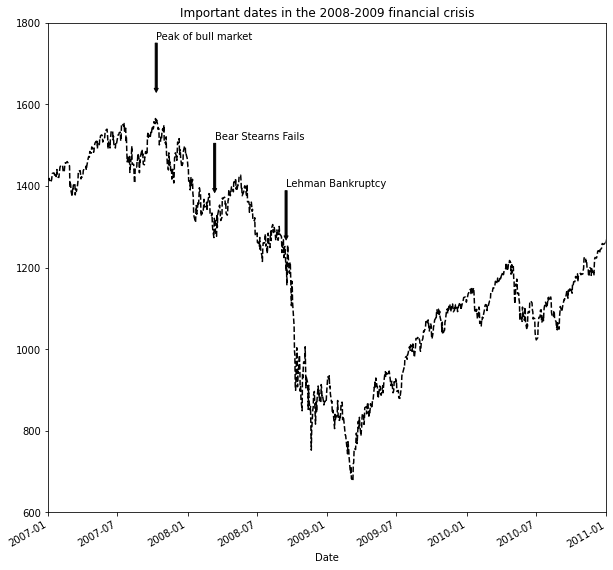

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)

spx.plot(ax = ax , style = 'k--') # k-- 점선 

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:  #label : 텍스트 입력 
    ax.annotate(label, xy=(date, spx.asof(date) + 75),                    # xy : 화살표 머리  
                xytext=(date, spx.asof(date) + 225),                      # xytext : 화살표 꼬리 
                arrowprops=dict(facecolor='black', headwidth=4, width=2,  # 화살표 서식 
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')
    
# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

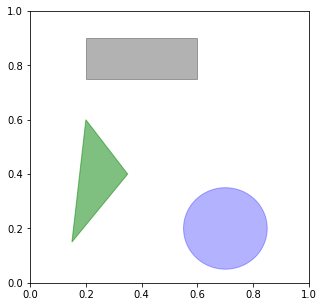

In [ ]:
# 도형 넣기 
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

* seaborn library  

In [ ]:
import seaborn as sns
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),
                  columns = ['A' , 'B', 'C', 'D'],
                  index = np.arange(0 ,100 ,10))
df

,A,B,C,D
0,-1.811734,0.063953,-0.453730,2.558708
10,-2.877690,-0.173203,-0.546200,2.905198
20,-1.909683,0.692682,1.204763,1.646677
30,-1.760532,0.115322,0.344186,0.122023
40,-2.039933,0.769855,-0.071647,0.345827
50,-0.534268,-0.089730,-0.717953,1.799126
60,-0.469616,-0.962938,-0.331086,2.127125
70,0.536948,-0.927449,1.251609,2.862947
80,1.544198,-2.614397,0.425115,2.985140
90,1.791067,-2.300794,-0.331397,3.271553


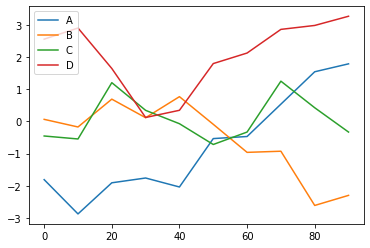

In [ ]:
df.plot()

### 10. 데이터 집계와 그룹 연산 

In [ ]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,0.746546,0.092797
1,a,two,-0.612800,1.752904
2,b,one,-0.358692,-2.742521
3,b,two,-0.205486,0.836276
4,a,one,-0.304444,0.304953


In [ ]:
for name , group in df.groupby('key1') :
  print(name , group.size)
  print(group)

a 12
  key1 key2     data1     data2
0    a  one  0.746546  0.092797
1    a  two -0.612800  1.752904
4    a  one -0.304444  0.304953
b 8
  key1 key2     data1     data2
2    b  one -0.358692 -2.742521
3    b  two -0.205486  0.836276


In [ ]:
# 그룹 데이터를 사전형으로 변환 
pieces = dict(list(df.groupby('key1')))
pieces

{'a':   key1 key2     data1     data2
 0    a  one  0.746546  0.092797
 1    a  two -0.612800  1.752904
 4    a  one -0.304444  0.304953, 'b':   key1 key2     data1     data2
 2    b  one -0.358692 -2.742521
 3    b  two -0.205486  0.836276}

In [ ]:
# dic['key']
pieces['b']

,key1,key2,data1,data2
2,b,one,-0.358692,-2.742521
3,b,two,-0.205486,0.836276


* 데이터 집계 

In [ ]:
grouped = df.groupby('key1')
grouped.mean()

,data1,data2
key1,,
a,-0.056899,0.716885
b,-0.282089,-0.953123


In [ ]:
def peak_to_peak(arr) :
  return arr.max() - arr.min()
# 자신만의 함수 적용 agg(func)
grouped.agg(peak_to_peak)

/usr/local/lib/python3.7/dist-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


,data1,data2
key1,,
a,1.359347,1.660107
b,0.153206,3.578797


In [ ]:
tips = pd.read_csv('/content/drive/MyDrive/pydata-book/examples/tips.csv')
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


In [ ]:
grouped = tips.groupby(['day', 'smoker'])

grouped.mean()

total_bill       tip      size   tip_pct
day  smoker                                          
Fri  No       18.420000  2.812500  2.250000  0.151650
     Yes      16.813333  2.714000  2.066667  0.174783
Sat  No       19.661778  3.102889  2.555556  0.158048
     Yes      21.276667  2.875476  2.476190  0.147906
Sun  No       20.506667  3.167895  2.929825  0.160113
     Yes      24.120000  3.516842  2.578947  0.187250
Thur No       17.113111  2.673778  2.488889  0.160298
     Yes      19.190588  3.030000  2.352941  0.163863

In [ ]:
grouped_pct =grouped['tip_pct']
grouped_pct.mean()

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [ ]:
# 여러 함수를 넣기 : agg( 함수 리스트) 
grouped_pct.agg(['mean', 'std', peak_to_peak])

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

In [ ]:
# 컬럼마다 다른 거 : 키  : 값
grouped.agg({'tip' : 'max' ,'size' : 'sum'})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

* apply : 일반적인 분리 -적용 -병합 

In [ ]:
tips.sort_values(by = 'tip_pct', ascending = False)

,total_bill,tip,smoker,day,time,size,tip_pct
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
...,...,...,...,...,...,...,...
187,30.46,2.00,Yes,Sun,Dinner,5,0.065660
0,16.99,1.01,No,Sun,Dinner,2,0.059447
57,26.41,1.50,No,Sat,Dinner,2,0.056797
102,44.30,2.50,Yes,Sat,Dinner,3,0.056433


In [ ]:
# 그룹별 상위 5개의 tip_pct 구하기  
# df에서 tip_pct 상위 6 , 내림차순 x 
def top(df, n=5 , columns= 'tip_pct') : 
  return df.sort_values(by = columns)[-n : ]  
top(tips , 5 )


,total_bill,tip,smoker,day,time,size,tip_pct
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [ ]:
# smoker 그룹 별로 적용
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

In [ ]:
# apply로 넘길 함수가 추가인자를 받음 top(df, n , columns =)
tips.groupby(['smoker', 'day']).apply(top , n = 1 , columns = 'total_bill') # smoker ,day 그룹 기준 total_bill 상위 1 레코드 

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

groupby 메서드에 group_keys = F -> 그룹 인덱스 생략 

In [ ]:
tips.groupby('smoker').apply(top ,n =3 ,columns = 'size')

total_bill  tip smoker   day    time  size   tip_pct
smoker                                                          
No     141       34.30  6.7     No  Thur   Lunch     6  0.195335
       156       48.17  5.0     No   Sun  Dinner     6  0.103799
       125       29.80  4.2     No  Thur   Lunch     6  0.140940
Yes    56        38.01  3.0    Yes   Sat  Dinner     4  0.078927
       216       28.15  3.0    Yes   Sat  Dinner     5  0.106572
       187       30.46  2.0    Yes   Sun  Dinner     5  0.065660

In [ ]:
tips.groupby('smoker', group_keys = False).apply(top ,n =3 ,columns = 'size')

,total_bill,tip,smoker,day,time,size,tip_pct
141,34.30,6.7,No,Thur,Lunch,6,0.195335
156,48.17,5.0,No,Sun,Dinner,6,0.103799
125,29.80,4.2,No,Thur,Lunch,6,0.140940
56,38.01,3.0,Yes,Sat,Dinner,4,0.078927
216,28.15,3.0,Yes,Sat,Dinner,5,0.106572
187,30.46,2.0,Yes,Sun,Dinner,5,0.065660


* cut 함수 ( 구간 분할 ) , qcut(변위 분할) 과 groupby 조합

In [ ]:
frame = pd.DataFrame({'data1': np.random.randn(1000),
                      'data2': np.random.randn(1000)})
quartiles = pd.cut(frame.data1, 4)    # frame의 data1 열을 4구간 등분 
quartiles[:10] # 카테고리 객체 

0      (-1.501, 0.11]
1       (0.11, 1.721]
2      (1.721, 3.332]
3      (-1.501, 0.11]
4       (0.11, 1.721]
5      (-1.501, 0.11]
6       (0.11, 1.721]
7    (-3.119, -1.501]
8       (0.11, 1.721]
9      (-1.501, 0.11]
Name: data1, dtype: category
Categories (4, interval[float64, right]): [(-3.119, -1.501] < (-1.501, 0.11] < (0.11, 1.721] <
                                           (1.721, 3.332]]

[링크 텍스트](https://)Categories (4, interval[float64, right]): [(-3.119, -1.501] < (-1.501, 0.11] < (0.11, 1.721] <                                           (1.721, 3.332]]


In [ ]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}         # group 객체의 min , max , count, mean을 구하는 함수
grouped = frame.data2.groupby(quartiles)
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
"(-3.119, -1.501]",-1.807106,1.731505,72.0,-0.069889
"(-1.501, 0.11]",-2.635105,3.021009,492.0,-0.075176
"(0.11, 1.721]",-2.957713,4.093489,398.0,0.033370
"(1.721, 3.332]",-1.824728,2.802930,38.0,0.048087


* 누락 데이터 제거   
df[].values_count(dropna = F) :  열의 nan 개수 확인   
df[].isnull().sum  

dropna( axis = 1 , thresh = n)   
dropna( subset = [columns] , axis = 0 , how = 'any' )  
df[ ].fillna( 바꿀값 : mean() , method ='ffill / bfill') 

### 예제

#### 랜덤 표본과 순열 : 트럼프 카드덱 

In [ ]:
# Hearts, Spades, Clubs, Diamonds
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1, 11)) + [10] * 3) * 4  # 12345678910 10 10 10 (13 * 4장)
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q'] 
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)

deck = pd.Series(card_val, index =cards)

In [ ]:
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [ ]:
def draw(deck , n = 5) :
  return deck.sample(n)     # 무작위 5
draw(deck)

4C     4
JS    10
5D     5
5S     5
2D     2
dtype: int64

In [ ]:
# 각 suit 별로 2장씩 뽑고 싶다. 
get_suit = lambda card : card[-1] # 카드 마지막 글자가 H S C D
deck.groupby(get_suit).apply(draw , n=2)

C  2C     2
   5C     5
D  QD    10
   JD    10
H  5H     5
   JH    10
S  9S     9
   4S     4
dtype: int64

In [ ]:
for card in cards: 
  print (card[-1])

H
H
H
H
H
H
H
H
H
H
H
H
H
S
S
S
S
S
S
S
S
S
S
S
S
S
C
C
C
C
C
C
C
C
C
C
C
C
C
D
D
D
D
D
D
D
D
D
D
D
D
D


* 피벗 테이블과 교차 일람표 
pd.pivot_table( df, index = , columns = , values = , aggfunc = , margins =)  

In [ ]:
pd.pivot_table(tips, 
               index = ['time', 'day'],
               columns = 'smoker',
               values = ['tip_pct', 'size']) #표시하고 싶은 값 

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

In [ ]:
pd.pivot_table(tips, 
               index = ['time', 'day'],
               columns = 'smoker',
               values = ['tip_pct', 'size'],
               margins = True)    #부분 합을 포함하도록 함 ALL 컬럼과 ALL 로우 추가 

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000  0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [ ]:
# 교차일람표 ( 총개수나 빈도) : aggfunc 인자에 count or len 
pd.pivot_table(tips, 
               index = ['time', 'smoker'],
               columns = 'day',
               values = 'tip_pct' , 
               aggfunc = 'count',
               margins = True)

day             Fri   Sat   Sun  Thur  All
time   smoker                             
Dinner No       3.0  45.0  57.0   1.0  106
       Yes      9.0  42.0  19.0   NaN   70
Lunch  No       1.0   NaN   NaN  44.0   45
       Yes      6.0   NaN   NaN  17.0   23
All            19.0  87.0  76.0  62.0  244

교차일람표  : 그룹 빈도를 계산    
pd.crosstab(x , y , margins = T/F)

In [ ]:
from io import StringIO
data = """\
Sample  Nationality  Handedness
1   USA  Right-handed
2   Japan    Left-handed
3   USA  Right-handed
4   Japan    Right-handed
5   Japan    Left-handed
6   Japan    Right-handed
7   USA  Right-handed
8   USA  Left-handed
9   Japan    Right-handed
10  USA  Right-handed"""
data = pd.read_table(StringIO(data), sep='\s+')
data

,Sample,Nationality,Handedness
0,1,USA,Right-handed
1,2,Japan,Left-handed
2,3,USA,Right-handed
3,4,Japan,Right-handed
4,5,Japan,Left-handed
5,6,Japan,Right-handed
6,7,USA,Right-handed
7,8,USA,Left-handed
8,9,Japan,Right-handed
9,10,USA,Right-handed


In [ ]:
# 국가별 오른쪽 왼쪽잡이  수 
pd.crosstab(data.Nationality , data.Handedness , margins = True)

Handedness,Left-handed,Right-handed,All
Nationality,,,
Japan,2,3,5
USA,1,4,5
All,3,7,10


: 일본은 왼 2 오 3 총 다섯명이고 미국은 왼1 오 4 총 5명이구나 .  
국가 상관없이  왼 3 오 7 이구나 . 

In [ ]:
# 요일별 시간대별 흡연자 여부
pd.crosstab([tips.day , tips.time] , tips.smoker , margins = True)

smoker        No  Yes  All
day  time                 
Fri  Dinner    3    9   12
     Lunch     1    6    7
Sat  Dinner   45   42   87
Sun  Dinner   57   19   76
Thur Dinner    1    0    1
     Lunch    44   17   61
All          151   93  244


### 11.시계열   


*   특정 순간의 TimeStamp
*   고정된 기간 2021년 1월
*   시간과 끝 타임스태프로 표시되는 시간 간격
*   실험 혹은 경과시간 



In [1]:
from datetime import datetime 
now = datetime.now()

print(now)
print(now.year, now.month, now.day)

2022-02-15 10:38:08.493489
2022 2 15


In [2]:
# timedelta ; datetime 객체 간 시간의 차이 
delta = datetime(2022,2, 1) - datetime(2022, 1, 1)
delta

datetime.timedelta(days=31)

In [3]:
from datetime import timedelta 
start = datetime(2022, 2, 14)
start + timedelta(50) # 50일 뒤는 ? 


datetime.datetime(2022, 4, 5, 0, 0)

In [4]:
start -(2 * timedelta(50)) # 100일 전은 ?

datetime.datetime(2021, 11, 6, 0, 0)

* 문자열을 datetime으로 변환

> : datetime.strptime(), parser.parse() , pd.to_datetime()


datetime , Timestamp 객체  -> 문자열 : str() , datetime.strftime() 

In [5]:
# datetime -> str
stamp = datetime(2022, 2, 14)
print(str(stamp), type(str(stamp)))
print(stamp.strftime('%Y-%m-%d') , type(stamp.strftime('%Y-%m-%d'))) # 형식 년 -월 - 일

2022-02-14 00:00:00 <class 'str'>
2022-02-14 <class 'str'>


포멧 규칙  :   
%Y - 4자리 년도 , %y - 2자리 년도 , %m - 2자리 월 . %d - 일 ,   
%H : 24시간 , %I : 12시간 , %M : 분, %S : 60초, %w : 정수 요일 0~6 ,   
%F : %Y-%m-%d 형식 축약 

In [6]:
# 문자열을 datetime화 strptime()
value = '2022-01-01'
datetime.strptime(value , '%Y-%m-%d')

datetime.datetime(2022, 1, 1, 0, 0)

In [7]:
# dateutil 패키지 parser.parse 메서드
from dateutil.parser import parse
parse('2022-03-01')

datetime.datetime(2022, 3, 1, 0, 0)

In [8]:
parse('7/7/2019', dayfirst =True) # 일 월 년 순 

datetime.datetime(2019, 7, 7, 0, 0)

In [17]:
# pd.to_datetime()
import pandas as pd
import numpy as np
pd.to_datetime('2021-03-2')

Timestamp('2021-03-02 00:00:00')

In [18]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02    0.867937
2011-01-05   -1.202377
2011-01-07    0.861723
2011-01-08   -0.779941
2011-01-10    0.860763
2011-01-12   -1.413992
dtype: float64

In [19]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [20]:
ts + ts[::2] # 홀수번째 항목

2011-01-02    1.735873
2011-01-05         NaN
2011-01-07    1.723446
2011-01-08         NaN
2011-01-10    1.721526
2011-01-12         NaN
dtype: float64

In [21]:
# 시계열 색인,선택
print(ts[ts.index[1]])
print(ts['20110112'])

-1.2023768464335787
-1.4139915016390154


pd.date_range(start = , end =, periods = number , freq = 시간간격, tz = 시간대) 

In [22]:
long_ts = pd.Series(np.random.randn(1000),
                    index = pd.date_range('2022/01/01', periods = 1000))

long_ts['2023']

2023-01-01   -1.370518
2023-01-02   -0.190335
2023-01-03    0.355671
2023-01-04   -0.113873
2023-01-05   -0.469254
                ...   
2023-12-27    0.067055
2023-12-28    2.489936
2023-12-29   -0.664033
2023-12-30   -0.644039
2023-12-31    0.082620
Freq: D, Length: 365, dtype: float64

In [23]:
long_ts['2022-12']

2022-12-01    1.819332
2022-12-02   -1.417490
2022-12-03   -0.806588
2022-12-04   -1.185898
2022-12-05    1.247057
2022-12-06    0.664320
2022-12-07   -0.050383
2022-12-08    1.871896
2022-12-09   -0.451600
2022-12-10   -0.582183
2022-12-11    0.877696
2022-12-12    0.922363
2022-12-13    0.201856
2022-12-14   -0.320175
2022-12-15    0.060253
2022-12-16   -1.221969
2022-12-17    0.223603
2022-12-18   -0.008305
2022-12-19    0.384818
2022-12-20   -0.968443
2022-12-21   -0.145234
2022-12-22   -0.766645
2022-12-23    0.947592
2022-12-24   -0.855042
2022-12-25    0.282379
2022-12-26   -1.552709
2022-12-27   -0.373570
2022-12-28    0.675095
2022-12-29   -0.015493
2022-12-30    0.214536
2022-12-31   -1.102131
Freq: D, dtype: float64

In [24]:
long_ts['2022-08-04':'2022-08-11']

2022-08-04    0.476083
2022-08-05    2.128215
2022-08-06    0.702272
2022-08-07    0.905540
2022-08-08   -0.471092
2022-08-09   -1.294654
2022-08-10    1.808608
2022-08-11   -0.823474
Freq: D, dtype: float64

In [25]:
long_ts['4/8/2022' : '4/11/2022'] # 범위 인덱싱 월/일/년

2022-04-08    1.616890
2022-04-09    0.820259
2022-04-10    0.757910
2022-04-11   -0.408216
Freq: D, dtype: float64

Series.truncate(before=None, after=None, axis=None, copy=True)  
: before a 와 after b 삭제  구간 a~ b

In [26]:
ts

2011-01-02    0.867937
2011-01-05   -1.202377
2011-01-07    0.861723
2011-01-08   -0.779941
2011-01-10    0.860763
2011-01-12   -1.413992
dtype: float64

In [27]:
# 05 ~ 10 
ts.truncate(before = '2011-01-05', after = '2011-01-10')

2011-01-05   -1.202377
2011-01-07    0.861723
2011-01-08   -0.779941
2011-01-10    0.860763
dtype: float64

pd.date_range()

In [28]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.268243,-0.892487,-1.741482,0.401202
2001-05-09,-0.826776,1.252830,-0.766710,0.339237
2001-05-16,0.282260,0.733829,-0.011504,1.050739
2001-05-23,-0.060373,-1.752666,-1.154191,-1.987716
2001-05-30,-0.255318,-0.163807,1.200933,-0.311775


* 중복된 색인을 갖는 시계열 

In [29]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [30]:
print(dup_ts['1/3/2000'])  # not duplicated
dup_ts['1/2/2000']  # duplicated


4


2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [31]:
# 유일 하지 않은 Timestamp 집계 : groupby인자에 단일단계 인덱싱 
grouped = dup_ts.groupby(level = 0) 
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [32]:
grouped.size()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [33]:
# pd.date_range() : 날짜 범위 생성 
pd.date_range('2020-01-01', '2020-12-01', freq = 'BM')  # BM  월 영업 마감일 

DatetimeIndex(['2020-01-31', '2020-02-28', '2020-03-31', '2020-04-30',
               '2020-05-29', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-30', '2020-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [35]:
# 빈도와 날짜 오프셋 
from pandas.tseries.offsets import Hour, Minute 
hour = Hour()
hour

<Hour>

In [36]:
pd.date_range('2022-02-01', '2022-02-03', freq = '4h')

DatetimeIndex(['2022-02-01 00:00:00', '2022-02-01 04:00:00',
               '2022-02-01 08:00:00', '2022-02-01 12:00:00',
               '2022-02-01 16:00:00', '2022-02-01 20:00:00',
               '2022-02-02 00:00:00', '2022-02-02 04:00:00',
               '2022-02-02 08:00:00', '2022-02-02 12:00:00',
               '2022-02-02 16:00:00', '2022-02-02 20:00:00',
               '2022-02-03 00:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [37]:
pd.date_range('2022-02-01', periods = 10, freq = '1h30min')

DatetimeIndex(['2022-02-01 00:00:00', '2022-02-01 01:30:00',
               '2022-02-01 03:00:00', '2022-02-01 04:30:00',
               '2022-02-01 06:00:00', '2022-02-01 07:30:00',
               '2022-02-01 09:00:00', '2022-02-01 10:30:00',
               '2022-02-01 12:00:00', '2022-02-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [39]:
#월별 주차 WOM-1MON
rng = pd.date_range('2022-02-01', '2022-09-01', freq = 'WOM-3FRI')    # 매월 3째주 금요일 
rng

DatetimeIndex(['2022-02-18', '2022-03-18', '2022-04-15', '2022-05-20',
               '2022-06-17', '2022-07-15', '2022-08-19'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

* 데이터 시프트

In [40]:
ts = pd.Series(np.random.randn(4),
               index = pd.date_range('2022-01-01', periods =4 , freq ='M'))
ts

2022-01-31   -0.332936
2022-02-28   -0.137240
2022-03-31    1.520650
2022-04-30   -0.394108
Freq: M, dtype: float64

In [42]:
ts.shift(1) # 밑으로 1칸 밀기 

2022-01-31         NaN
2022-02-28   -0.332936
2022-03-31   -0.137240
2022-04-30    1.520650
Freq: M, dtype: float64

In [43]:
ts.shift(-2)  # 위로 2칸 밀기

2022-01-31    1.520650
2022-02-28   -0.394108
2022-03-31         NaN
2022-04-30         NaN
Freq: M, dtype: float64

In [45]:
# shift를 통한 % 변화(증감율) 계산 x / x+1 
ts/ ts.shift(1) -1

2022-01-31          NaN
2022-02-28    -0.587788
2022-03-31   -12.080223
2022-04-30    -1.259171
Freq: M, dtype: float64

In [47]:
# shift에 빈도를 넘겨 TimeStamp를 확장 
ts.shift(2 , freq = 'M') 
# 1~ 4 월 데이터 -> 3 ~ 6월 데이터 

2022-03-31   -0.332936
2022-04-30   -0.137240
2022-05-31    1.520650
2022-06-30   -0.394108
Freq: M, dtype: float64

In [48]:
ts.shift(6 , freq = 'D') # 6일 + 

2022-02-06   -0.332936
2022-03-06   -0.137240
2022-04-06    1.520650
2022-05-06   -0.394108
dtype: float64

* 기간과 기간연산 

In [51]:
p = pd.Period(2022 ,freq ='A-DEC')  # A-JAN. A-FAB : 주어진 월의 마지막일을 가리키는 연간주기 
p # 2022 1월 1일 ~ 12월 31일 기간 

Period('2022', 'A-DEC')

In [52]:
p-5   # 5년전 

Period('2017', 'A-DEC')

In [54]:
# 두 기간이 같은 빈도를 가질 경우 
p - pd.Period(2015 ,freq ='A-DEC') 

<7 * YearEnds: month=12>

In [59]:
rng = pd.period_range('2022-01-01', periods = 6 , freq = 'M')
rng  # 22년 1월 / 2월 / 3월 ... Class = PeriodIndex

PeriodIndex(['2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06'], dtype='period[M]')

In [61]:
pd.Series(np.random.randn(6), index = rng) 

2022-01   -2.746758
2022-02    0.678833
2022-03    0.454215
2022-04   -0.204836
2022-05    1.534357
2022-06    0.181427
Freq: M, dtype: float64

* Period 의 빈도 변환  : asfreq 메서드 

In [63]:
p = pd.Period('2022', freq = 'A-DEC')
p

Period('2022', 'A-DEC')

In [65]:
p.asfreq('M', how = 'start')  # 월간 빈도로 변환 1월 

Period('2022-01', 'M')

In [66]:
p.asfreq('M', how = 'end')

Period('2022-12', 'M')

In [68]:
# 분기 빈도 /4 
p = pd.Period('2022Q4', freq = 'Q-JAN')
p # 2022Q4 : 11~ 1월 

Period('2022Q4', 'Q-JAN')

In [69]:
p.asfreq('D', 'start')

Period('2021-11-01', 'D')

In [70]:
p.asfreq('D', 'end')

Period('2022-01-31', 'D')

* TimeStamp와 Periods 변환 

In [71]:
rng = pd.date_range('2022-01-01', periods =3 , freq = 'M')
ts = pd.Series(np.random.randn(3), index= rng)
ts

2022-01-31    1.689392
2022-02-28    0.689697
2022-03-31   -0.381728
Freq: M, dtype: float64

In [72]:
pts = ts.to_period() # Period 화 
pts

2022-01    1.689392
2022-02    0.689697
2022-03   -0.381728
Freq: M, dtype: float64

In [75]:
pts.to_timestamp(how = 'end') # 월 말 

2022-01-31 23:59:59.999999999    1.689392
2022-02-28 23:59:59.999999999    0.689697
2022-03-31 23:59:59.999999999   -0.381728
dtype: float64

* 배열로 PeriodIndex 생성 :  
연도와 분기 합친 인덱스 생성 

In [76]:
data = pd.read_csv('/content/drive/MyDrive/pydata-book/examples/macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [78]:
# year과 quarter 열을 조합 pd.PeriodIndex
index = pd.PeriodIndex(year = data.year , quarter = data.quarter , freq = 'Q-DEC')  # freq = 'Q-DEC' : 12월 마감 쿼터 주기 
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [81]:
data.index =index 
data.realgdp

1959Q1     2710.349
1959Q2     2778.801
1959Q3     2775.488
1959Q4     2785.204
1960Q1     2847.699
            ...    
2008Q3    13324.600
2008Q4    13141.920
2009Q1    12925.410
2009Q2    12901.504
2009Q3    12990.341
Freq: Q-DEC, Name: realgdp, Length: 203, dtype: float64

* 리샘플링과 빈도 변환  :   
pd.resample(freq = '' , axis = 0/1 , fill_method = ffill/bfill (업샘플링시 사용할 보간), closed =right/ left (다운 샘플링시 간격의 어느 쪽 포함?))    

상위빈도 데이터 - > 하위 빈도 집계 : 다운 샘플링 ,   
반대 : 업샘플링.   
빈도 = 는 제외

In [82]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01   -0.206214
2000-01-02    0.315935
2000-01-03   -1.728935
2000-01-04    0.652313
2000-01-05    0.285614
                ...   
2000-04-05   -0.656646
2000-04-06    0.008538
2000-04-07    0.146497
2000-04-08    0.696260
2000-04-09    0.182980
Freq: D, Length: 100, dtype: float64

In [83]:
ts.resample('M').mean()

2000-01-31   -0.132106
2000-02-29   -0.006065
2000-03-31   -0.070302
2000-04-30    0.224512
Freq: M, dtype: float64

In [84]:
ts.resample('M', kind='period').mean()

2000-01   -0.132106
2000-02   -0.006065
2000-03   -0.070302
2000-04    0.224512
Freq: M, dtype: float64

In [85]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts


2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [86]:
# 다운 샘플링 
ts.resample('5min', closed='right').sum()


1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

5분간격 쪼개기   
00 : 01~ 05 (00, 05]
05 : 06 ~10 (05, 10]



In [87]:
# 각 그룹의 오른쪽 값을 라벨로 사용 
ts.resample('5min', closed='right', label = 'right').sum()
# 00 / 05 / 10/ 15

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [88]:
# loffset: 나뉜 그룹의 라벨에 맞추기 위한 오프셋 
# '-1s' 는 집계된 라벨을 1초 앞당김 . -> 더욱 직관적인 구간 확인 

In [90]:
ts.resample('5min', closed ='right' , label = 'right', loffset = '-1s').sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  """Entry point for launching an IPython kernel.


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

업샘플링 : 하위 -> 상위빈도로 변환 . ( 집계 필요 x )

In [92]:
# 주간 데이터 
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.859412,-0.264753,0.578142,0.278825
2000-01-12,-1.276854,-1.924934,0.748926,0.162218


In [94]:
# 주간 -> 일간
df_daily = frame.resample('D').asfreq()
df_daily # 그룹당 1개 값 , 나머지 결측치 

,Colorado,Texas,New York,Ohio
2000-01-05,-0.859412,-0.264753,0.578142,0.278825
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-1.276854,-1.924934,0.748926,0.162218


In [97]:
# 이전 데이터로 채우기 ffill
frame.resample('D').ffill()


,Colorado,Texas,New York,Ohio
2000-01-05,-0.859412,-0.264753,0.578142,0.278825
2000-01-06,-0.859412,-0.264753,0.578142,0.278825
2000-01-07,-0.859412,-0.264753,0.578142,0.278825
2000-01-08,-0.859412,-0.264753,0.578142,0.278825
2000-01-09,-0.859412,-0.264753,0.578142,0.278825
2000-01-10,-0.859412,-0.264753,0.578142,0.278825
2000-01-11,-0.859412,-0.264753,0.578142,0.278825
2000-01-12,-1.276854,-1.924934,0.748926,0.162218


In [98]:
# 보간 범위지정
frame.resample('D').ffill(limit = 2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.859412,-0.264753,0.578142,0.278825
2000-01-06,-0.859412,-0.264753,0.578142,0.278825
2000-01-07,-0.859412,-0.264753,0.578142,0.278825
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-1.276854,-1.924934,0.748926,0.162218


### 12. 고급 판다스 

* 범주화 

In [99]:
fruits = ['apple', 'orange', 'apple', 'apple'] * 2
N = len(fruits)
df = pd.DataFrame({'fruit': fruits,
                   'basket_id': np.arange(N),
                   'count': np.random.randint(3, 15, size=N),
                   'weight': np.random.uniform(0, 4, size=N)},
                  columns=['basket_id', 'fruit', 'count', 'weight'])
df

,basket_id,fruit,count,weight
0,0,apple,7,1.837734
1,1,orange,10,0.515241
2,2,apple,3,3.078906
3,3,apple,12,2.632121
4,4,apple,12,0.010657
5,5,orange,8,0.651232
6,6,apple,3,1.142405
7,7,apple,5,1.960819


In [101]:
fruit_cat = df['fruit'].astype('category')
fruit_cat

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): ['apple', 'orange']

In [103]:
# Category 객체 
fruit_cat.values.categories

Index(['apple', 'orange'], dtype='object')

In [105]:
fruit_cat.values.codes    # 0 : apple , 1: orange

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=int8)

In [106]:
#더미변수 변환 (원핫 인코딩)
cat_s = pd.Series(['a','b','c','d']*2 , dtype = 'category')
cat_s

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [107]:
pd.get_dummies(cat_s)

,a,b,c,d
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1


* 고급 Groupby 사용  
그룹연산 transform :  원본 df와 같은형태로 변형해 연산

In [108]:
df = pd.DataFrame({'key': ['a', 'b', 'c'] * 4,
                   'value': np.arange(12.)})
df

,key,value
0,a,0.0
1,b,1.0
2,c,2.0
3,a,3.0
4,b,4.0
5,c,5.0
6,a,6.0
7,b,7.0
8,c,8.0
9,a,9.0


In [109]:
g = df.groupby('key').value
g.mean()


key
a    4.5
b    5.5
c    6.5
Name: value, dtype: float64

In [111]:
g.transform(lambda x: x.mean()) # g.transform('mean')


0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

In [112]:
g.transform(lambda x : x*2)

0      0.0
1      2.0
2      4.0
3      6.0
4      8.0
5     10.0
6     12.0
7     14.0
8     16.0
9     18.0
10    20.0
11    22.0
Name: value, dtype: float64

In [113]:
g.transform(lambda x : x.rank(ascending =False))  # 랭크 먹이기 

0     4.0
1     4.0
2     4.0
3     3.0
4     3.0
5     3.0
6     2.0
7     2.0
8     2.0
9     1.0
10    1.0
11    1.0
Name: value, dtype: float64

In [114]:
# 정규화
def nomalize(x) :
  return (x - x.mean()) / x.std()
g.transform(nomalize)

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64